In [1]:
getwd()

[1] "/content"

In [2]:
setwd("C:/Users/alsdu/Downloads/20220501_데이터분석 스터디")

ERROR: ignored

In [4]:
library(dplyr); library(magrittr)

# ⚽1. Worldcupgoals
첨부된 'Worldcupgoals' 데이터셋은 1930년부터 2018년까지 FIFA 월드컵에서득점한 선수관련데이터입니다.
- 1) 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 출력하세요.
- 2) Brazil 국가의 월드컵 출전 횟수가 ~~5회 이상인 선수들을 내림차순으로 정렬하세요.~~ **3회인 선수들을 도출하시오.**

In [17]:
wc<-read.csv("/content/Worldcupgoals.csv")

In [18]:
str(wc)

'data.frame':	1295 obs. of  4 variables:
 $ Player : chr  "Miroslav Klose" "Ronaldo" "Gerd Muller" "Just Fontaine" ...
 $ Goals  : int  16 15 14 13 12 11 11 10 10 10 ...
 $ Years  : chr  "2002-2006-2010-2014" "1998-2002-2006" "1970-1974" "1958" ...
 $ Country: chr  "Germany" "Brazil" "Germany" "France" ...


In [19]:
summary(wc) 

    Player              Goals           Years             Country         
 Length:1295        Min.   : 1.000   Length:1295        Length:1295       
 Class :character   1st Qu.: 1.000   Class :character   Class :character  
 Mode  :character   Median : 1.000   Mode  :character   Mode  :character  
                    Mean   : 1.924                                        
                    3rd Qu.: 2.000                                        
                    Max.   :16.000                                        

In [20]:
head(wc)

,Player,Goals,Years,Country
,<chr>,<int>,<chr>,<chr>
1,Miroslav Klose,16,2002-2006-2010-2014,Germany
2,Ronaldo,15,1998-2002-2006,Brazil
3,Gerd Muller,14,1970-1974,Germany
4,Just Fontaine,13,1958,France
5,Pele,12,1958-1962-1966-1970,Brazil
6,Jurgen Klinsmann,11,1990-1994-1998,Germany


## 1-1 골득점을 한 선수가 가장 많은 나라 상위 5개 국가와 그 선수 숫자를 출력하세요.

- `step1` count 변수 생성

In [21]:
wc$count<- rep(1, each=nrow(wc) ) ; head(wc)

,Player,Goals,Years,Country,count
,<chr>,<int>,<chr>,<chr>,<dbl>
1,Miroslav Klose,16,2002-2006-2010-2014,Germany,1
2,Ronaldo,15,1998-2002-2006,Brazil,1
3,Gerd Muller,14,1970-1974,Germany,1
4,Just Fontaine,13,1958,France,1
5,Pele,12,1958-1962-1966-1970,Brazil,1
6,Jurgen Klinsmann,11,1990-1994-1998,Germany,1


- `step2` Country 그룹 기준으로 count를 sum한 뒤 내림차순으로 출력

In [22]:
wc  %>%   group_by(Country)  %>% summarise(Player_count= sum(count)) %>% arrange (desc(Player_count))  %>% head(5)

Country,Player_count
<chr>,<dbl>
Brazil,81
Germany,78
Italy,60
Argentina,59
France,58


## 1-2 Brazil 국가의 월드컵 출전 횟수가 3회인 선수들을 도출하세요. (문제수정)

In [23]:
#wc[wc$Country=="Brazil", ]

- `step1` gsub() ➡️ factor형 'Years'변수에서 숫자만 추출('\\D')해서 새로운 변수('years_new')로 할당  
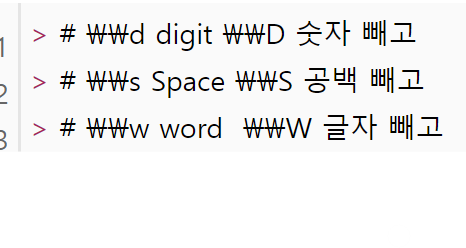
ref.https://cceeddcc.tistory.com/110

In [24]:
wc$years_new<-gsub('\\D','', wc[,3])  ;  #gsub(숫자만 뺌, 공백제외, 해당변수)

- `step2` nchar() ➡️ 월드컵 출전 횟수 변수 생성

In [25]:
wc %<>% mutate( years_count= nchar(years_new)/4)  ; head(wc,3)

,Player,Goals,Years,Country,count,years_new,years_count
,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,Miroslav Klose,16,2002-2006-2010-2014,Germany,1,2002200620102014,4
2,Ronaldo,15,1998-2002-2006,Brazil,1,199820022006,3
3,Gerd Muller,14,1970-1974,Germany,1,19701974,2


- `step3` filter(), select() ➡️ 최종 결과 도출

In [26]:
wc  %>%  filter(Country=="Brazil", years_count==3 )   %>%  select (Player,Goals,Country,years_count )

Player,Goals,Country,years_count
<chr>,<int>,<chr>,<dbl>
Ronaldo,15,Brazil,3
Jairzinho,9,Brazil,3
Rivelino,6,Brazil,3
Garrincha,5,Brazil,3
Didi,3,Brazil,3
Dirceu,3,Brazil,3
Branco,1,Brazil,3
Roberto Carlos,1,Brazil,3
Kaka,1,Brazil,3
